# Allocate renewable resources to the bus

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx


In [8]:
# Set up directories
cwd = os.getcwd()
if 'dev' in cwd:
    parent_dir = os.path.dirname(cwd)
    data_dir = os.path.join(parent_dir, 'data')
else:
    data_dir = os.path.join(cwd, 'data')

gis_data_dir = os.path.join(data_dir, 'gis')
if not os.path.exists(gis_data_dir):
    raise FileNotFoundError('GIS data directory not found.')

print('GIS data directory: {}'.format(gis_data_dir))

GIS data directory: /home/by276/models/NYgrid-python/data/gis


# Read data

## Thermal generators

In [84]:
# Read thermal generator locations
gen_info = pd.read_csv(os.path.join(data_dir, 
                                    'genInfo.csv'))
# Turn into geodataframe
gen_info = gpd.GeoDataFrame(gen_info, 
                            geometry=gpd.points_from_xy(gen_info.Longitude,
                                                        gen_info.Latitude))
# Set CRS
gen_info = gen_info.set_crs(epsg=4326)

gen_info.head()

,NYISOName,PTID,Zone,UnitType,FuelType,Latitude,Longitude,maxPower,minPower,maxRampAgc,maxRamp10,maxRamp30,maxRamp60,HeatRateLM_R2,HeatRateQM_R2,BusName,NCOST,cost_1,cost_0,geometry
0,Allegany,23514,B,Combined Cycle,Natural Gas,42.5083,-78.0661,66.0,11.0,0.733333,7.333333,22.00,44.0,0.862443,0.891407,62,1,22.682017,-40.234372,POINT (-78.06610 42.50830)
1,Arthur Kill ST 2,23512,J,Steam Turbine,Natural Gas,40.5915,-74.2027,349.0,96.0,2.850000,28.500000,85.50,171.0,0.995837,0.995860,82,1,25.306225,736.980064,POINT (-74.20270 40.59150)
2,Arthur Kill ST 3,23513,J,Steam Turbine,Natural Gas,40.5915,-74.2027,539.0,1.0,3.108333,31.083333,93.25,186.5,0.986235,0.991460,82,1,25.957282,993.894899,POINT (-74.20270 40.59150)
3,Astoria 2,24149,J,Steam Turbine,Natural Gas,40.7869,-73.9122,153.0,1.0,0.808333,8.083333,24.25,48.5,0.987563,0.988910,82,1,31.302863,430.832898,POINT (-73.91220 40.78690)
4,Astoria 3,23516,J,Steam Turbine,Fuel Oil 2,40.7869,-73.9122,756.0,40.0,6.033333,60.333333,181.00,362.0,0.996075,0.996269,82,1,66.084194,3680.943877,POINT (-73.91220 40.78690)


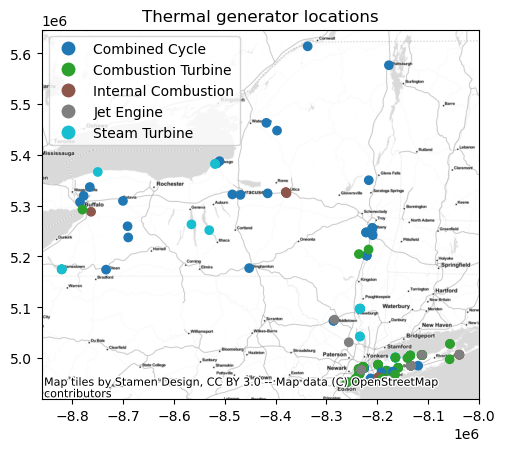

In [97]:
# Shop locations in a map
# Match web map projection
ax = gen_info.to_crs(epsg=3857).plot('UnitType', legend=True)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Thermal generator locations')

## Solar farms

In [31]:
# Read solar farm locations
# Read current solar farm locations (aggregated by zip code)
current_solar_info = pd.read_csv(os.path.join(data_dir, 
                                    'solar',
                                    'solar_farms.csv'))
# Turn into geodataframe
current_solar_info = gpd.GeoDataFrame(current_solar_info, 
                            geometry=gpd.points_from_xy(current_solar_info.longitude,
                                                        current_solar_info.latitude))
# Set CRS
current_solar_info = current_solar_info.set_crs(epsg=4326)

current_solar_info



,zip_code,totalnameplatekwdc,latitude,longitude,geometry
0,10001,62.44,42.4561,-73.9277,POINT (-73.92770 42.45610)
1,10002,1420.19,42.7063,-74.0193,POINT (-74.01930 42.70630)
2,10003,191.47,42.6108,-74.1466,POINT (-74.14660 42.61080)
3,10004,38.28,42.5759,-73.9640,POINT (-73.96400 42.57590)
4,10007,11.07,42.4757,-73.7977,POINT (-73.79770 42.47570)
...,...,...,...,...,...
1611,14898,36.67,40.6102,-74.0878,POINT (-74.08780 40.61020)
1612,14901,492.58,40.5973,-74.0768,POINT (-74.07680 40.59730)
1613,14903,5318.50,40.5682,-74.1184,POINT (-74.11840 40.56820)
1614,14904,17.55,40.5085,-74.2445,POINT (-74.24450 40.50850)


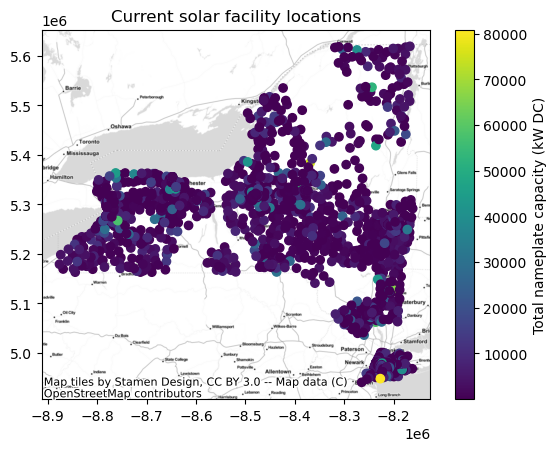

In [98]:
# Shop locations in a map
# Match web map projection
ax = current_solar_info.to_crs(epsg=3857).plot('totalnameplatekwdc',
                                               legend=True,
                                               legend_kwds={'label': 'Total nameplate capacity (kW DC)'})
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Current solar facility locations')

In [91]:
# Read future solar farm locations
future_solar_info = pd.read_csv(os.path.join(data_dir,
                                             'solar',
                                             'future_solar_farms.csv'),
                                             index_col=0)
# Turn into geodataframe
future_solar_info = gpd.GeoDataFrame(future_solar_info,
                                     geometry=gpd.points_from_xy(future_solar_info.longitude,
                                                                 future_solar_info.latitude))
# Set CRS
future_solar_info = future_solar_info.set_crs(epsg=4326)

future_solar_info


,index,FID,longitude,latitude,Zone,Local Population Density,Acres,Site Size,Site Capacity,totalnameplatekwdc,geometry
0,3245,3245,-73.639811,40.688801,K,7859.594717,218.336956,0.883579,34.459585,34459.584672,POINT (-73.63981 40.68880)
1,3246,3246,-73.632720,40.696226,K,7802.735292,33.558074,0.135805,5.296388,5296.388271,POINT (-73.63272 40.69623)
2,3244,3244,-73.664500,40.625916,K,6998.219315,73.167635,0.296099,11.547868,11547.867851,POINT (-73.66450 40.62592)
3,3243,3243,-73.667721,40.612932,K,6948.505825,11.350832,0.045935,1.791474,1791.473873,POINT (-73.66772 40.61293)
4,7209,7210,-73.530395,40.686001,K,6589.101675,16.397505,0.066358,2.587978,2587.977827,POINT (-73.53039 40.68600)
...,...,...,...,...,...,...,...,...,...,...,...
526,8442,8447,-78.768565,42.845054,A,2676.096825,12.792536,0.051770,2.019015,2019.014550,POINT (-78.76856 42.84505)
527,8665,8670,-78.719455,42.913722,A,2667.101544,121.839635,0.493068,19.229650,19229.649788,POINT (-78.71945 42.91372)
528,8373,8378,-78.839288,42.817331,A,2666.119172,10.008236,0.040502,1.579575,1579.575283,POINT (-78.83929 42.81733)
529,9086,9091,-78.809087,43.024827,A,2654.564904,12.022361,0.048653,1.897460,1897.459671,POINT (-78.80909 43.02483)


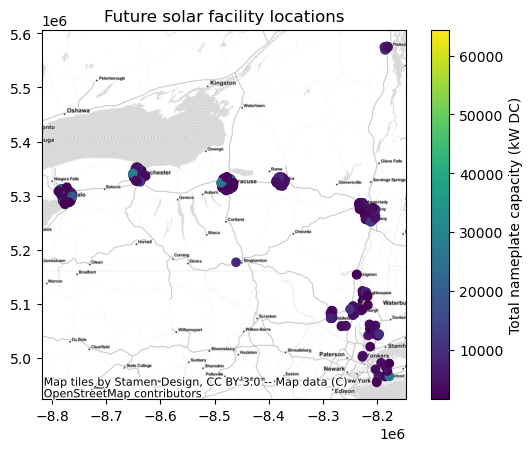

In [99]:
# Shop locations in a map
# Match web map projection
ax = future_solar_info.to_crs(epsg=3857).plot('totalnameplatekwdc', legend=True,
                                              legend_kwds={'label': 'Total nameplate capacity (kW DC)'})
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Future solar facility locations')

## Onshore wind

In [46]:
# Read onshore wind turbine locations
onshore_wind_info = pd.read_csv(os.path.join(data_dir, 
                                    'onshore_wind',
                                    'uswtdb_ny.csv'),
                                    index_col=0)
# Turn into geodataframe
onshore_wind_info = gpd.GeoDataFrame(onshore_wind_info, 
                            geometry=gpd.points_from_xy(onshore_wind_info.xlong,
                                                        onshore_wind_info.ylat))
# Set CRS
onshore_wind_info = onshore_wind_info.set_crs(epsg=4326)

onshore_wind_info


,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,...,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year,geometry
case_id,,,,,,,,,,,,,,,,,,,,,
3075458,36-123728,2013-WTE-439-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.20978,42.38207,61673.0,0,NaN,POINT (-79.20978 42.38207)
3075483,36-123754,2016-WTE-8733-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.22976,42.42740,61673.0,0,NaN,POINT (-79.22976 42.42740)
3075490,36-123761,2016-WTE-8740-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.24846,42.42875,61673.0,0,NaN,POINT (-79.24846 42.42875)
3075459,36-123729,2016-WTE-10287-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/18/2018,Digital Globe,-79.21964,42.38646,61673.0,0,NaN,POINT (-79.21964 42.38646)
3075465,36-123735,2013-WTE-461-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.25908,42.42524,61673.0,0,NaN,POINT (-79.25908 42.42524)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124539,36-197731,2019-WTE-9476-OE,NaN,NY,Steuben County,36101,unknown Steuben County,NaN,11,NaN,...,1,1,1/31/2022,Digital Globe,-77.51514,42.47650,NaN,0,NaN,POINT (-77.51514 42.47650)
3124566,36-197734,2019-WTE-9483-OE,NaN,NY,Steuben County,36101,unknown Steuben County,NaN,11,NaN,...,1,1,10/28/2021,Digital Globe,-77.54897,42.48269,NaN,0,NaN,POINT (-77.54897 42.48269)
3124621,36-197735,2019-WTE-9484-OE,NaN,NY,Steuben County,36101,unknown Steuben County,NaN,11,NaN,...,1,1,10/28/2021,Digital Globe,-77.55095,42.48731,NaN,0,NaN,POINT (-77.55095 42.48731)


In [100]:
onshore_wind_info.columns

Index(['faa_ors', 'faa_asn', 'usgs_pr_id', 't_state', 't_county', 't_fips',
       'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu', 't_model', 't_cap',
       't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr', 't_conf_loc',
       't_img_date', 't_img_srce', 'xlong', 'ylat', 'eia_id', 'retrofit',
       'retrofit_year', 'geometry'],
      dtype='object')

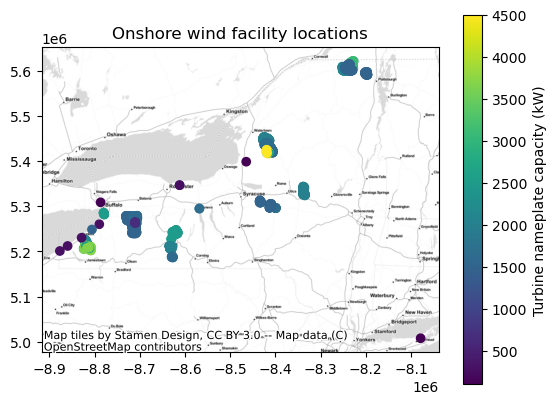

In [102]:
# Shop locations in a map
# Match web map projection
ax = onshore_wind_info.to_crs(epsg=3857).plot('t_cap', legend=True,
                                              legend_kwds={'label': 'Turbine nameplate capacity (kW)'})
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Onshore wind facility locations')

## NY Grid

In [103]:
# Read shapefile of NYISO zone map
nyiso_zone = gpd.read_file(os.path.join(gis_data_dir, 'NYISO Load Zone.shp'))

# Read shapefile of NYGrid buses
nygrid_bus = gpd.read_file(os.path.join(gis_data_dir, 'Bus.shp'))

# Read shapefile of NYGrid branches
nygrid_branch = gpd.read_file(os.path.join(gis_data_dir, 'Branch.shp'))

# Read shapefile of NYGrid generators
nygrid_generator = gpd.read_file(os.path.join(gis_data_dir, 'Generator.shp'))


In [104]:
nyiso_zone.head()

,FID,FID_Elec_I,ZONE_ID,ZONE_NAME,ZN_ABBRV,ISO_ABBRV,ISO_ID,ISO_Comno,ISO_NAME,COLOR,DOMAIN,area,len,FID_Utilit,OBJECTID,COMP_FULL,Shape_Leng,Shape_Area,geometry
0,0.0,0.0,10438570.0,Capital,CAPITL,NYISO,8201859.0,W6258,NEW YORK INDEPENDENT SYSTEM OPERATOR,4.0,N America,2.288922,9.945065,0.0,1.0,Central Hudson Gas and Electric,6.290814e+05,6.667589e+09,"MULTIPOLYGON (((-73.84511 42.05673, -73.81852 ..."
1,1.0,0.0,10438570.0,Capital,CAPITL,NYISO,8201859.0,W6258,NEW YORK INDEPENDENT SYSTEM OPERATOR,4.0,N America,2.288922,9.945065,3.0,4.0,Municipal Utilities,8.334656e+05,9.054384e+08,"MULTIPOLYGON (((-74.56199 42.64015, -74.54903 ..."
2,2.0,0.0,10438570.0,Capital,CAPITL,NYISO,8201859.0,W6258,NEW YORK INDEPENDENT SYSTEM OPERATOR,4.0,N America,2.288922,9.945065,4.0,5.0,National Grid,4.174501e+06,6.290735e+10,"MULTIPOLYGON (((-73.24869 43.49179, -73.30187 ..."
3,3.0,0.0,10438570.0,Capital,CAPITL,NYISO,8201859.0,W6258,NEW YORK INDEPENDENT SYSTEM OPERATOR,4.0,N America,2.288922,9.945065,5.0,6.0,NYS Electric and Gas,3.750289e+06,4.301016e+10,"MULTIPOLYGON (((-73.50351 42.06972, -73.51955 ..."
4,4.0,1.0,10438571.0,Central,CENTRL,NYISO,8201859.0,W6258,NEW YORK INDEPENDENT SYSTEM OPERATOR,1.0,N America,2.380156,9.019512,3.0,4.0,Municipal Utilities,8.334656e+05,9.054384e+08,"MULTIPOLYGON (((-76.47326 41.99979, -76.54312 ..."


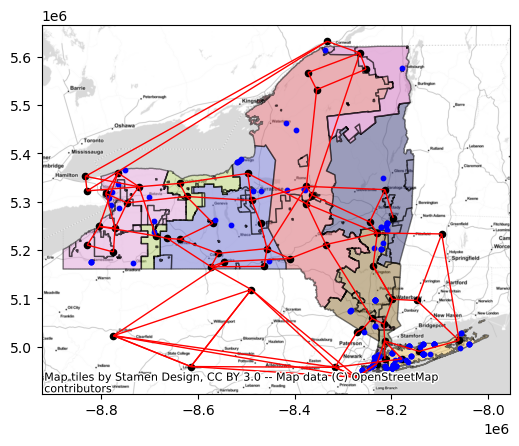

In [105]:

# NYISO zone map
ax = nyiso_zone.to_crs(epsg=3857).plot('ZONE_NAME', cmap='tab20b',
                                        alpha=0.5, edgecolor='k')

# NYGrid buses, branches, and generators
nygrid_bus.to_crs(epsg=3857).plot(ax=ax, color='black', markersize=20)
nygrid_branch.to_crs(epsg=3857).plot(ax=ax, color='red', linewidth=1)
nygrid_generator.to_crs(epsg=3857).plot(ax=ax, color='blue', markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)


# Allocation

In [6]:
# Allocate generating facilities to buses
